In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("cleaned_level3.csv")

In [3]:
df

,flat_type,price,address,buildup_area,age_of_property,which_floor,furnishing,bedrooms,bathrooms,balcony,parking
0,3 BHK Flat,3.95,Kanjurmarg West,1550,recent construction,middle,Fully Furnished,3.0,2.0,1.0,yes
1,1 BHK Flat,0.19,Palghar,630,recent construction,lower,Unfurnished,1.0,1.0,2.0,yes
2,1 BHK Flat,0.73,Mira Road East,580,recent construction,middle,Semi Furnished,1.0,2.0,2.0,no
3,1 BHK Flat,1.10,Dahisar East,410,recent construction,middle,Semi Furnished,1.0,2.0,1.0,yes
4,3 BHK Flat,2.25,others,1052,recent construction,middle,Semi Furnished,3.0,2.0,3.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
8420,3 BHK Flat,1.85,Mulund West,1100,mid age property,lower,Fully Furnished,3.0,3.0,1.0,yes
8421,1 BHK Flat,0.20,Naigaon East,280,recent construction,lower,Semi Furnished,1.0,2.0,0.0,no
8422,1 BHK Flat,0.97,Tardeo,315,recent construction,lower,Semi Furnished,1.0,2.0,0.0,yes
8423,2 BHK Flat,2.36,Kandivali West,706,recent construction,middle,Unfurnished,2.0,2.0,0.0,yes


<Axes: xlabel='flat_type'>

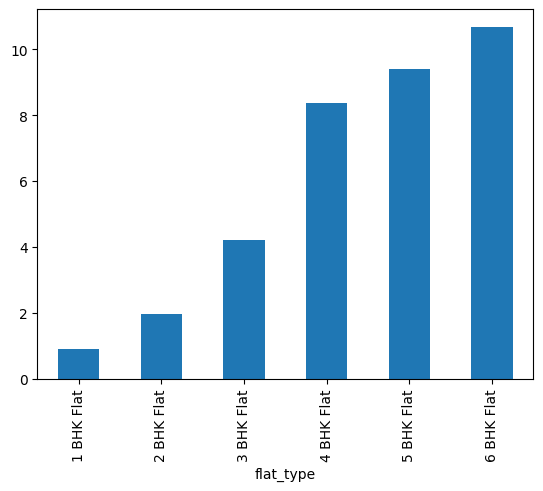

In [6]:
df.groupby("flat_type")['price'].mean().plot(kind='bar')

<Axes: xlabel='address'>

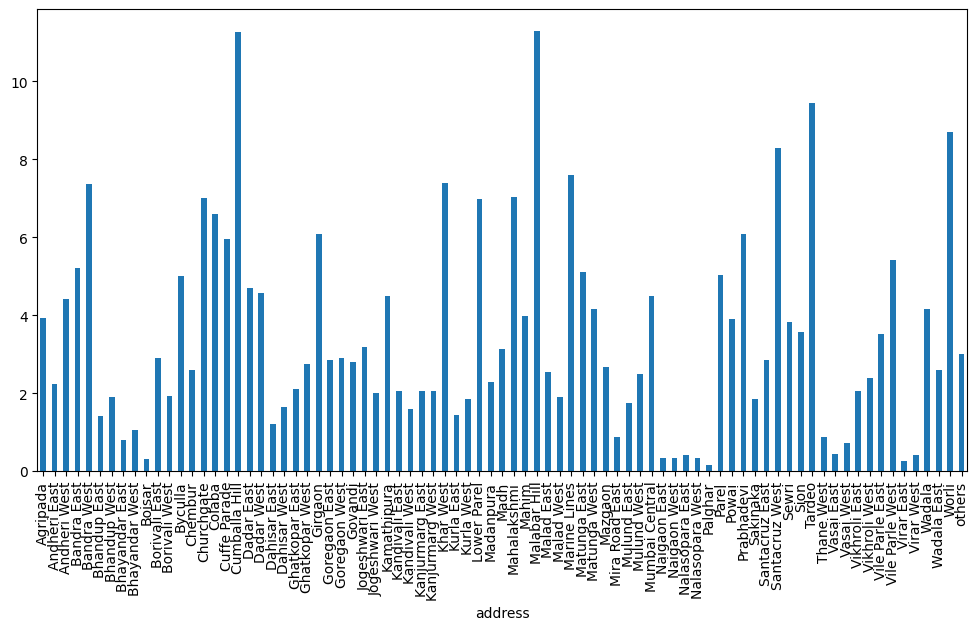

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
df.groupby("address")['price'].mean().plot(kind='bar')

<Axes: xlabel='age_of_property'>

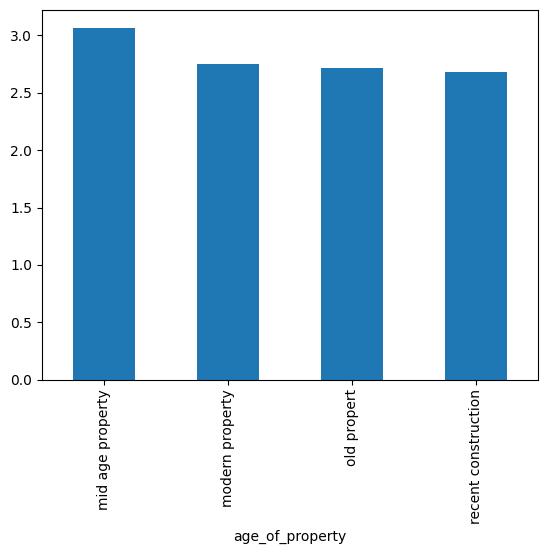

In [9]:
df.groupby("age_of_property")['price'].mean().plot(kind='bar')

<Axes: xlabel='which_floor'>

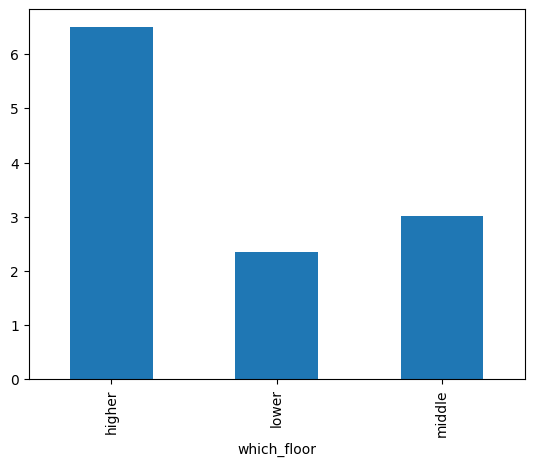

In [10]:
df.groupby("which_floor")['price'].mean().plot(kind='bar')

<Axes: xlabel='furnishing'>

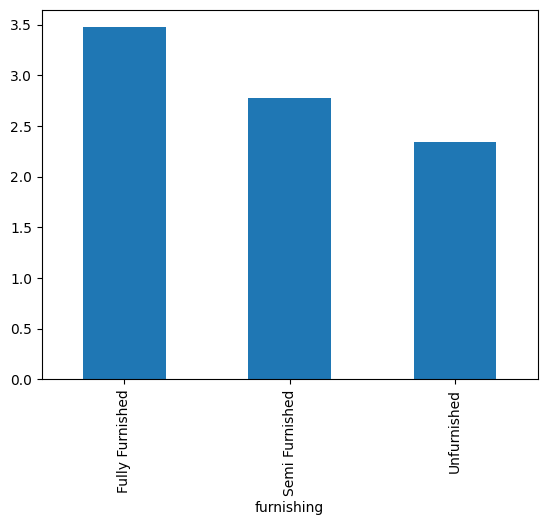

In [12]:
df.groupby("furnishing")['price'].mean().plot(kind='bar')

<Axes: xlabel='parking'>

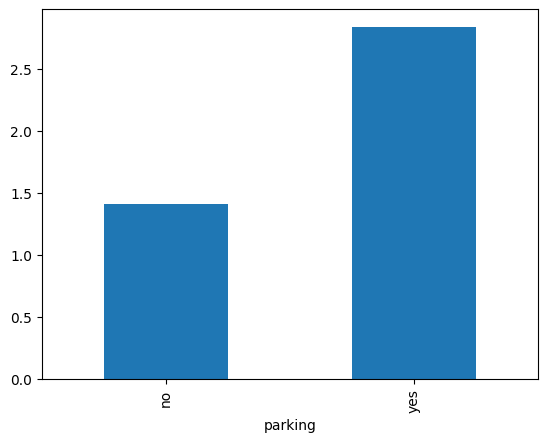

In [13]:
df.groupby("parking")['price'].mean().plot(kind='bar')

In [14]:
df

,flat_type,price,address,buildup_area,age_of_property,which_floor,furnishing,bedrooms,bathrooms,balcony,parking
0,3 BHK Flat,3.95,Kanjurmarg West,1550,recent construction,middle,Fully Furnished,3.0,2.0,1.0,yes
1,1 BHK Flat,0.19,Palghar,630,recent construction,lower,Unfurnished,1.0,1.0,2.0,yes
2,1 BHK Flat,0.73,Mira Road East,580,recent construction,middle,Semi Furnished,1.0,2.0,2.0,no
3,1 BHK Flat,1.10,Dahisar East,410,recent construction,middle,Semi Furnished,1.0,2.0,1.0,yes
4,3 BHK Flat,2.25,others,1052,recent construction,middle,Semi Furnished,3.0,2.0,3.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
8420,3 BHK Flat,1.85,Mulund West,1100,mid age property,lower,Fully Furnished,3.0,3.0,1.0,yes
8421,1 BHK Flat,0.20,Naigaon East,280,recent construction,lower,Semi Furnished,1.0,2.0,0.0,no
8422,1 BHK Flat,0.97,Tardeo,315,recent construction,lower,Semi Furnished,1.0,2.0,0.0,yes
8423,2 BHK Flat,2.36,Kandivali West,706,recent construction,middle,Unfurnished,2.0,2.0,0.0,yes


In [17]:
from scipy.stats import f_oneway

In [18]:
new  = df[df['age_of_property'] == 'recent construction']['price']
modern = df[df['age_of_property'] == 'modern property']['price']
mid = df[df['age_of_property'] == 'mid age property']['price']
old = df[df['age_of_property'] == 'old propert']['price']
f_oneway(new,modern,mid,old)
# H0 : there is no difference between the means of the groups
# p<0.05 reject the ho

F_onewayResult(statistic=2.092612543347773, pvalue=0.09893327187650049)

In [19]:
df

,flat_type,price,address,buildup_area,age_of_property,which_floor,furnishing,bedrooms,bathrooms,balcony,parking
0,3 BHK Flat,3.95,Kanjurmarg West,1550,recent construction,middle,Fully Furnished,3.0,2.0,1.0,yes
1,1 BHK Flat,0.19,Palghar,630,recent construction,lower,Unfurnished,1.0,1.0,2.0,yes
2,1 BHK Flat,0.73,Mira Road East,580,recent construction,middle,Semi Furnished,1.0,2.0,2.0,no
3,1 BHK Flat,1.10,Dahisar East,410,recent construction,middle,Semi Furnished,1.0,2.0,1.0,yes
4,3 BHK Flat,2.25,others,1052,recent construction,middle,Semi Furnished,3.0,2.0,3.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
8420,3 BHK Flat,1.85,Mulund West,1100,mid age property,lower,Fully Furnished,3.0,3.0,1.0,yes
8421,1 BHK Flat,0.20,Naigaon East,280,recent construction,lower,Semi Furnished,1.0,2.0,0.0,no
8422,1 BHK Flat,0.97,Tardeo,315,recent construction,lower,Semi Furnished,1.0,2.0,0.0,yes
8423,2 BHK Flat,2.36,Kandivali West,706,recent construction,middle,Unfurnished,2.0,2.0,0.0,yes


In [22]:
un  = df[df['furnishing'] == 'Unfurnished']['price']
semi = df[df['furnishing'] == 'Semi Furnished']['price']
full = df[df['furnishing'] == 'Fully Furnished']['price']
f_oneway(un,semi,full)

F_onewayResult(statistic=60.23077220929256, pvalue=1.0651576041981513e-26)

In [23]:
lower  = df[df['which_floor'] == 'lower']['price']
middle = df[df['which_floor'] == 'middle']['price']
higher = df[df['which_floor'] == 'higher']['price']
f_oneway(lower,middle,higher)

F_onewayResult(statistic=390.013885540963, pvalue=1.0232413930327608e-162)

In [24]:
no = df[df['parking'] == 'no']['price']
yes = df[df['parking'] == 'yes']['price']
f_oneway(no,yes)

F_onewayResult(statistic=187.37852676285956, pvalue=3.3520277997819966e-42)

In [25]:
df.head()

,flat_type,price,address,buildup_area,age_of_property,which_floor,furnishing,bedrooms,bathrooms,balcony,parking
0,3 BHK Flat,3.95,Kanjurmarg West,1550,recent construction,middle,Fully Furnished,3.0,2.0,1.0,yes
1,1 BHK Flat,0.19,Palghar,630,recent construction,lower,Unfurnished,1.0,1.0,2.0,yes
2,1 BHK Flat,0.73,Mira Road East,580,recent construction,middle,Semi Furnished,1.0,2.0,2.0,no
3,1 BHK Flat,1.10,Dahisar East,410,recent construction,middle,Semi Furnished,1.0,2.0,1.0,yes
4,3 BHK Flat,2.25,others,1052,recent construction,middle,Semi Furnished,3.0,2.0,3.0,yes


In [27]:
new_df = df.copy()

In [28]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
new_df['flat_type'] = encoder.fit_transform(new_df['flat_type'].values.reshape(-1,1))
new_df['address'] = encoder.fit_transform(new_df['address'].values.reshape(-1,1))
new_df['age_of_property'] = encoder.fit_transform(new_df['age_of_property'].values.reshape(-1,1))
new_df['furnishing'] = encoder.fit_transform(new_df['furnishing'].values.reshape(-1,1))
new_df['which_floor'] = encoder.fit_transform(new_df['which_floor'].values.reshape(-1,1))
new_df['parking'] = encoder.fit_transform(new_df['parking'].values.reshape(-1,1))

In [29]:
new_df

,flat_type,price,address,buildup_area,age_of_property,which_floor,furnishing,bedrooms,bathrooms,balcony,parking
0,2.0,3.95,34.0,1550,3.0,2.0,0.0,3.0,2.0,1.0,1.0
1,0.0,0.19,58.0,630,3.0,1.0,2.0,1.0,1.0,2.0,1.0
2,0.0,0.73,50.0,580,3.0,2.0,1.0,1.0,2.0,2.0,0.0
3,0.0,1.10,20.0,410,3.0,2.0,1.0,1.0,2.0,1.0,1.0
4,2.0,2.25,80.0,1052,3.0,2.0,1.0,3.0,2.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8420,2.0,1.85,52.0,1100,0.0,1.0,0.0,3.0,3.0,1.0,1.0
8421,0.0,0.20,54.0,280,3.0,1.0,1.0,1.0,2.0,0.0,0.0
8422,0.0,0.97,67.0,315,3.0,1.0,1.0,1.0,2.0,0.0,1.0
8423,1.0,2.36,32.0,706,3.0,2.0,2.0,2.0,2.0,0.0,1.0


In [30]:
X = new_df.drop(columns=['price'],axis=1)
y = new_df['price']

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X,y)

rf_data = pd.DataFrame({'features':X.columns,
                        'rf_imp':rf.feature_importances_})

In [32]:
rf_data.sort_values(by='rf_imp',ascending=False)

,features,rf_imp
2,buildup_area,0.676538
1,address,0.127155
0,flat_type,0.092070
8,balcony,0.028763
4,which_floor,0.018693
7,bathrooms,0.015818
5,furnishing,0.014456
3,age_of_property,0.012309
6,bedrooms,0.011574
9,parking,0.002626


In [33]:
from sklearn.ensemble import GradientBoostingRegressor

gr = GradientBoostingRegressor()
gr.fit(X,y)

gr_data = pd.DataFrame({'features':X.columns,
                        'gr_imp':gr.feature_importances_})

gr_data.sort_values(by='gr_imp',ascending=False)

,features,gr_imp
2,buildup_area,0.724500
1,address,0.111342
0,flat_type,0.083813
6,bedrooms,0.042287
4,which_floor,0.013815
8,balcony,0.013590
7,bathrooms,0.005089
3,age_of_property,0.003912
5,furnishing,0.001136
9,parking,0.000516


In [35]:
X = new_df.drop(columns=['price'],axis=1)
y = new_df['price']

In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [53]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 

sfs = SFS(lr,k_features=7,forward=True,scoring="r2",cv=5,n_jobs=-1)
sfs.fit(X,y)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(7, 7),
                          n_jobs=-1, scoring='r2')

In [54]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.6544006087836031, 0.7691717261730441, 0.731...",0.612308,"(buildup_area,)",0.178997,0.139266,0.069633
2,"(2, 8)","[0.6711835614200049, 0.7842971669948553, 0.740...",0.638606,"(buildup_area, balcony)",0.155902,0.121297,0.060649
3,"(2, 6, 8)","[0.6801065997383474, 0.7860458343268626, 0.739...",0.64096,"(buildup_area, bedrooms, balcony)",0.156083,0.121438,0.060719
4,"(0, 2, 6, 8)","[0.6809180660814627, 0.7858129752600824, 0.740...",0.641815,"(flat_type, buildup_area, bedrooms, balcony)",0.155644,0.121096,0.060548
5,"(0, 2, 5, 6, 8)","[0.6800526034095458, 0.7850981528032586, 0.741...",0.642521,"(flat_type, buildup_area, furnishing, bedrooms...",0.15402,0.119833,0.059916
6,"(0, 2, 3, 5, 6, 8)","[0.6789887491228683, 0.7848354443521885, 0.742...",0.642703,"(flat_type, buildup_area, age_of_property, fur...",0.153481,0.119413,0.059707
7,"(0, 2, 3, 5, 6, 7, 8)","[0.6802020649781149, 0.7870559536121071, 0.743...",0.642915,"(flat_type, buildup_area, age_of_property, fur...",0.155487,0.120974,0.060487


In [58]:
sfs = SFS(rfr,k_features=7,forward=True,scoring="r2",cv=5,n_jobs=-1)
sfs.fit(X,y)
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.6637254432762727, 0.7276479414667743, 0.696...",0.593086,"(buildup_area,)",0.164079,0.127659,0.063829
2,"(1, 2)","[0.7647347112350561, 0.8404976477405158, 0.810...",0.761663,"(address, buildup_area)",0.084892,0.066049,0.033024
3,"(1, 2, 6)","[0.7951650200611343, 0.8561187817702296, 0.810...",0.781921,"(address, buildup_area, bedrooms)",0.076863,0.059802,0.029901
4,"(1, 2, 5, 6)","[0.7933877912326198, 0.8493655476468891, 0.813...",0.785314,"(address, buildup_area, furnishing, bedrooms)",0.068253,0.053103,0.026552
5,"(1, 2, 5, 6, 7)","[0.7923626602640629, 0.8504158875121763, 0.814...",0.785993,"(address, buildup_area, furnishing, bedrooms, ...",0.068229,0.053084,0.026542
6,"(1, 2, 5, 6, 7, 9)","[0.7917947029552862, 0.8477039927306494, 0.816...",0.78519,"(address, buildup_area, furnishing, bedrooms, ...",0.06988,0.054369,0.027184
7,"(0, 1, 2, 5, 6, 7, 9)","[0.7903027218181309, 0.8528215772650103, 0.813...",0.784878,"(flat_type, address, buildup_area, furnishing,...",0.073134,0.056901,0.02845


In [60]:
sfs = SFS(lr,k_features=7,forward=False,scoring="r2",cv=5,n_jobs=-1)
sfs.fit(X,y)
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.6808386466964139, 0.7890028143811993, 0.746...",0.64181,"(flat_type, address, buildup_area, age_of_prop...",0.160569,0.124928,0.062464
9,"(0, 2, 3, 4, 5, 6, 7, 8, 9)","[0.6797305969952341, 0.7887269858246146, 0.745...",0.642771,"(flat_type, buildup_area, age_of_property, whi...",0.157778,0.122757,0.061378
8,"(0, 2, 3, 4, 5, 6, 7, 8)","[0.6797675063905457, 0.7891640334432213, 0.745...",0.642905,"(flat_type, buildup_area, age_of_property, whi...",0.157865,0.122824,0.061412
7,"(0, 2, 3, 5, 6, 7, 8)","[0.6802020649781149, 0.7870559536121071, 0.743...",0.642915,"(flat_type, buildup_area, age_of_property, fur...",0.155487,0.120974,0.060487


In [61]:
sfs = SFS(rfr,k_features=7,floating=True,forward=False,scoring="r2",cv=5,n_jobs=-1)
sfs.fit(X,y)
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.7902130480503953, 0.8515573493093803, 0.811...",0.777453,"(flat_type, address, buildup_area, age_of_prop...",0.073415,0.057119,0.02856
9,"(0, 1, 2, 3, 4, 5, 6, 7, 9)","[0.7898514881738647, 0.8496574242862338, 0.811...",0.781236,"(flat_type, address, buildup_area, age_of_prop...",0.071141,0.05535,0.027675
8,"(0, 1, 2, 4, 5, 6, 7, 9)","[0.7814803494344363, 0.8486931682672489, 0.811...",0.781756,"(flat_type, address, buildup_area, which_floor...",0.069226,0.05386,0.02693
7,"(0, 1, 2, 5, 6, 7, 9)","[0.7856351320052302, 0.8500707511026422, 0.813...",0.785068,"(flat_type, address, buildup_area, furnishing,...",0.068397,0.053215,0.026608


In [62]:
X

,flat_type,address,buildup_area,age_of_property,which_floor,furnishing,bedrooms,bathrooms,balcony,parking
0,2.0,34.0,1550,3.0,2.0,0.0,3.0,2.0,1.0,1.0
1,0.0,58.0,630,3.0,1.0,2.0,1.0,1.0,2.0,1.0
2,0.0,50.0,580,3.0,2.0,1.0,1.0,2.0,2.0,0.0
3,0.0,20.0,410,3.0,2.0,1.0,1.0,2.0,1.0,1.0
4,2.0,80.0,1052,3.0,2.0,1.0,3.0,2.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...
8420,2.0,52.0,1100,0.0,1.0,0.0,3.0,3.0,1.0,1.0
8421,0.0,54.0,280,3.0,1.0,1.0,1.0,2.0,0.0,0.0
8422,0.0,67.0,315,3.0,1.0,1.0,1.0,2.0,0.0,1.0
8423,1.0,32.0,706,3.0,2.0,2.0,2.0,2.0,0.0,1.0


In [63]:
df

,flat_type,price,address,buildup_area,age_of_property,which_floor,furnishing,bedrooms,bathrooms,balcony,parking
0,3 BHK Flat,3.95,Kanjurmarg West,1550,recent construction,middle,Fully Furnished,3.0,2.0,1.0,yes
1,1 BHK Flat,0.19,Palghar,630,recent construction,lower,Unfurnished,1.0,1.0,2.0,yes
2,1 BHK Flat,0.73,Mira Road East,580,recent construction,middle,Semi Furnished,1.0,2.0,2.0,no
3,1 BHK Flat,1.10,Dahisar East,410,recent construction,middle,Semi Furnished,1.0,2.0,1.0,yes
4,3 BHK Flat,2.25,others,1052,recent construction,middle,Semi Furnished,3.0,2.0,3.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
8420,3 BHK Flat,1.85,Mulund West,1100,mid age property,lower,Fully Furnished,3.0,3.0,1.0,yes
8421,1 BHK Flat,0.20,Naigaon East,280,recent construction,lower,Semi Furnished,1.0,2.0,0.0,no
8422,1 BHK Flat,0.97,Tardeo,315,recent construction,lower,Semi Furnished,1.0,2.0,0.0,yes
8423,2 BHK Flat,2.36,Kandivali West,706,recent construction,middle,Unfurnished,2.0,2.0,0.0,yes


In [65]:
df = df.drop(columns=['age_of_property','bathrooms','parking'])

In [70]:
df.to_csv("data_for_model.csv",index=False)